<a href="https://colab.research.google.com/github/kemmie-c/MMFADataset/blob/main/%E4%BD%9C%E6%A5%AD1_ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import pandas as pd
import re

# ===== 讀取 Excel =====
excel_file_path = '/content/train_Data.xlsx'
df = pd.read_excel(excel_file_path)
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [202]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=100,  # 100 samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1442,)
Shape of X_test: (100,)
Shape of y_train: (1442,)
Shape of y_test: (100,)

Distribution of labels in y_train:


,count
label,
1,721
0,721



Distribution of labels in y_test:


,count
label,
0,50
1,50


In [203]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Original X_train sample:


,content_cleaned
895,打破年齡設限‧看見青春立體。0AAA。撐補成分歲月細節一股腦地顯現在外表。支‧撐‧力000A...
187,兒童專科舒緩情緒消化提升敏感調理全台最足量健康食品變聰明變聰明的零食天然增加學習效率針對敏弱...
1440,0%增稠000%香料000%色素。維持消化道機能。日本專利膳食纖維多元益生菌。黃金比例口感細...
601,小胸救星升AAA不難。小胸&大胸女孩是不是有以下煩惱。撐不起衣服。哺乳後ㄋㄋ大縮水。美型拉提...
69,便秘救星、減肥聖品、減肥瘦瘦水、便祕必喝、便祕必喝、被封是減肥&解便秘聖品、便祕必喝、減肥聖...



Segmented X_train sample:


,content_cleaned
895,打破 年齡 設限 ‧ 看見 青春 立體 。 0AAA 。 撐補 成分 歲 月 細節 一股 腦...
187,兒童 專科 舒緩 情緒 消化 提升 敏感 調理 全台 最 足量 健康 食品 變聰明 變聰明 ...
1440,0% 增稠 000% 香料 000% 色素 。 維持 消化道 機能 。 日本 專利 膳食 纖...
601,小胸 救星 升 AAA 不難 。 小胸 & 大胸 女孩 是不是 有 以下 煩惱 。 撐 不起...
69,便秘 救星 、 減肥 聖品 、 減 肥瘦 瘦水 、 便 祕 必 喝 、 便 祕 必 喝 、 ...



Original X_test sample:


,content_cleaned
1078,享受尚好生活。享食尚健字號甘甘好活力加值組黃金組合甘甘好膠囊衛部健食字第AAA000號專為您...
1318,超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康...
1348,商品。0益生菌益生質互利共生。0項全球專利後生元調整體質。幫助維持消化道機能。0色素、0人工...
89,抗藍光護眼軟糖。不如就給他吃抗藍光軟糖吧。吸收強光、過濾藍光、保護眼睛。適合族群:長時間盯著...
718,體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放...



Segmented X_test sample:


,content_cleaned
1078,享受 尚好 生活 。 享食 尚健字號 甘甘好 活力 加值 組黃金 組合 甘甘好 膠囊 衛部 ...
1318,超模 之 鑰 。 防溢 方案 。 官網 000 下 殺 000 典悅 生醫 AAA 搭配 營...
1348,商品 。 0 益生菌 益生質 互利 共生 。 0 項 全球 專利後生 元 調整 體質 。 幫...
89,抗藍光護 眼軟 糖 。 不如 就給 他 吃 抗藍光 軟糖 吧 。 吸收 強光 、 過濾 藍光...
718,體力 、 美力 一次 擁有 。 0 種 AAA 群 完整 組合 。 0 合 000 美妍 配...


In [204]:
# ✅ 改進 1: 使用 TF-IDF 特徵
from sklearn.feature_extraction.text import TfidfVectorizer

# ====== 中文停用詞 ======
chinese_stopwords = [
    "的", "了", "是", "在", "我", "有", "和", "也", "就", "與", "及",
    "不", "但", "而", "或", "被", "一個", "沒有", "你", "他", "她",
    "我們", "你們", "他們", "因此", "這個", "那個", "如果", "因為",
    "所以", "此外", "而且", "此外", "仍然", "並且"
]

# ====== TF-IDF 加入停用詞 ======
vectorizer = TfidfVectorizer(
    min_df=2,
    max_features=5000,
    stop_words=chinese_stopwords
)  # 限制特徵數量避免過大

X_train_bow = vectorizer.fit_transform(X_train_segmented)
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1442, 5000)
Shape of X_test_bow: (100, 5000)


In [205]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [206]:
# ✅ 改進 2: 增加隱藏層 + Dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_bow.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [207]:
# Train the model
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)
X_train_bow_dense = X_train_bow.todense()

# ✅ 改進 3: 加入 EarlyStopping 防止 overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train_bow_dense, y_train_numerical,
                    epochs=10,         # 增加訓練次數
                    shuffle=True,       # 改成 True 打亂資料
                    batch_size=64,      # 減小 batch 提高學習穩定度
                    validation_split=0.3,
                    callbacks=[early_stop])

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5899 - loss: 0.6848 - val_accuracy: 0.8568 - val_loss: 0.6347
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9091 - loss: 0.5792 - val_accuracy: 0.9376 - val_loss: 0.4362
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9799 - loss: 0.3335 - val_accuracy: 0.9700 - val_loss: 0.2136
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9912 - loss: 0.1215 - val_accuracy: 0.9746 - val_loss: 0.1162
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9980 - loss: 0.0428 - val_accuracy: 0.9700 - val_loss: 0.0912
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.9769 - val_loss: 0.0833
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.9769 - val_loss: 0.0811
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9769 - v

In [208]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/

--2025-11-15 08:34:52--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.183.102, 142.251.183.113, 142.251.183.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.183.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-11-15 08:34:52--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.201.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  --.-KB/s    in 0.09s   

2025-11-15 08:34:5

In [209]:
import pandas as pd                             #用於讀取資料集，或製作資料框架
import matplotlib.pyplot as plt                 #用於繪製統計圖

import matplotlib as mpl                        #用於設定中文字型
from matplotlib.font_manager import fontManager #用於設定中文字型

#設定中文字型（若無需求可跳過）
fontManager.addfont('/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


=== SHAP: computing global explanations ===


/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_66
Received: inputs=['Tensor(shape=(300, 5000))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_66
Received: inputs=['Tensor(shape=(600, 5000))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_66
Received: inputs=['Tensor(shape=(100, 5000))']
  w

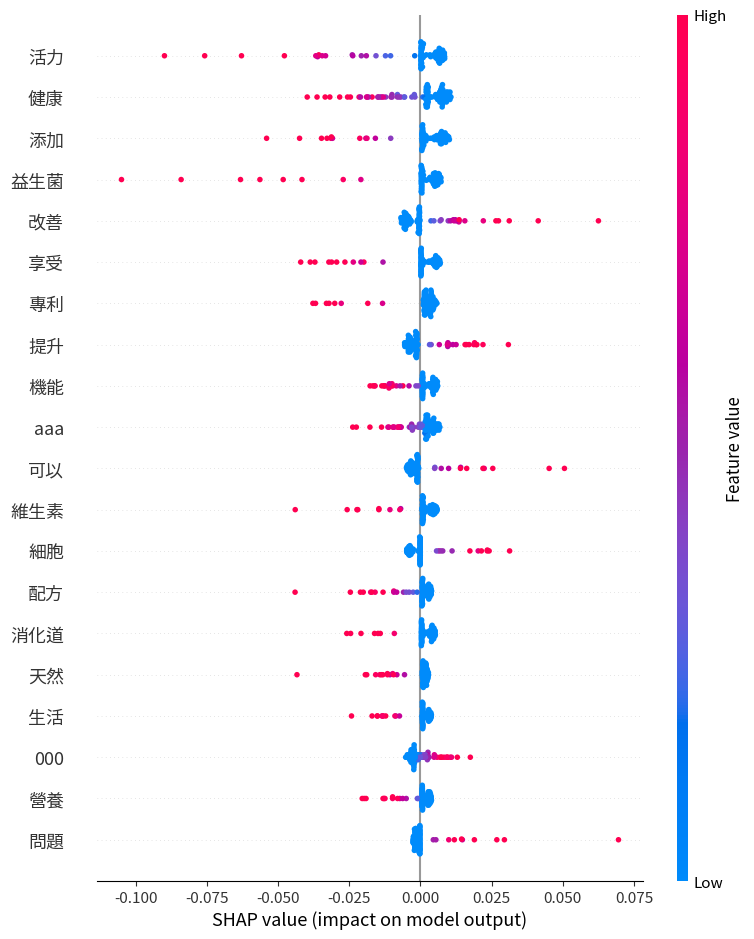

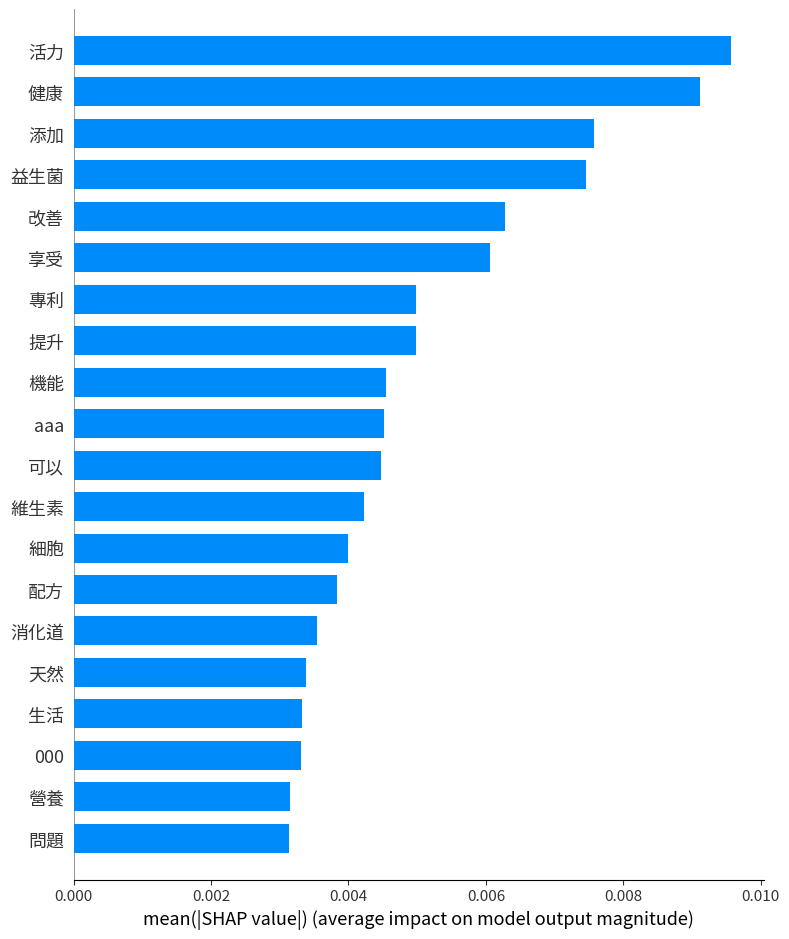

In [210]:
# ======== SHAP：全域解釋性 (放在訓練完成後、模型評估前) ========
import shap
import numpy as np

print("\n=== SHAP: computing global explanations ===")

# SHAP 需要 background data（採樣 300 筆以加速）
# Convert numpy.matrix to numpy.ndarray using .A
background = X_train_bow_dense[:300].A

# DeepExplainer 專用於深度學習模型
explainer = shap.DeepExplainer(model, background)

# 計算 test set 的 SHAP 值
# Convert numpy.matrix to numpy.ndarray using .A
shap_values = explainer.shap_values(X_test_bow_dense.A)

# Summary plot（全域最重要）
# shap_values is an array of shape (num_samples, num_features, 1), so squeeze the whole array
shap.summary_plot(
    shap_values.squeeze(), # Changed from shap_values[0].squeeze() to shap_values.squeeze()
    X_test_bow_dense.A,
    feature_names=vectorizer.get_feature_names_out()
)

# Bar Plot（平均絕對 SHAP 值）
shap.summary_plot(
    shap_values.squeeze(), # Changed from shap_values[0].squeeze() to shap_values.squeeze()
    X_test_bow_dense.A,
    feature_names=vectorizer.get_feature_names_out(),
    plot_type="bar"
)
# ======== SHAP END ========



Available features for dependence plot:
['000' '000000' '000aaa' '000aaa000' '000aaa000aaa' '0aaa' 'a000'
 'a000aaa' 'aa' 'aaa' 'aaa000' 'aaa000aaa' 'aaa000aaa000' 'aaaaaa' 'a型'
 '一下' '一些' '一份' '一位' '一切' '一動' '一包' '一半' '一口' '一句' '一同' '一圈' '一夜' '一大'
 '一天' '一定' '一小' '一層' '一年' '一整天' '一新' '一日' '一旦' '一杯' '一條' '一樣' '一次' '一款'
 '一步' '一段' '一氧化氮' '一滴' '一片' '一瓶' '一盒']

Drawing dependence plot for feature: 000


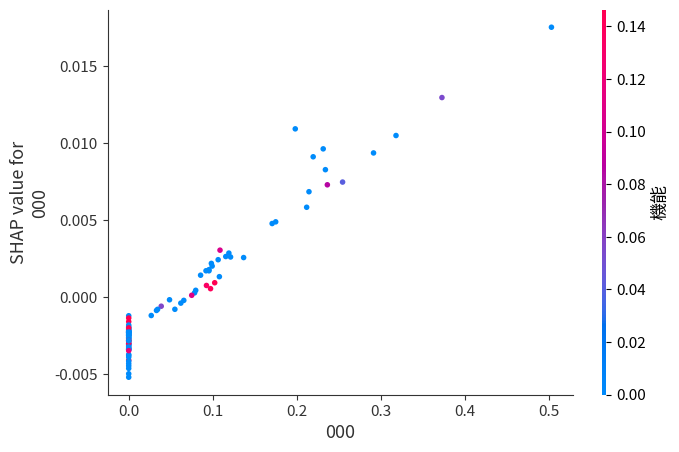


Generated SHAP force plot for test sample #0


In [211]:
# ======== SHAP 依賴性分析 (Dependence Plot) ========
# 依賴圖：顯示「特徵值」如何影響「模型輸出」
# 你可以選任何特徵，例如重要性最高的特徵

top_features = vectorizer.get_feature_names_out()[:50]   # 取前 50 大特徵（避免太多）

print("\nAvailable features for dependence plot:")
print(top_features)

# === 範例：畫其中一個特徵的 dependence plot ===
# 可以改成你想畫的特徵名稱（必須在 TF-IDF 字彙中）
feature_to_plot = top_features[0]     # 預設畫最重要的第一個特徵
feature_index = list(vectorizer.get_feature_names_out()).index(feature_to_plot)

print(f"\nDrawing dependence plot for feature: {feature_to_plot}")

shap.dependence_plot(
    feature_index,
    shap_values.squeeze(), # Fix: Squeeze shap_values to make it 2D
    X_test_bow_dense.A,    # Fix: Convert numpy.matrix to numpy.ndarray
    feature_names=vectorizer.get_feature_names_out()
)
# ======== SHAP Dependence END ========



# ======== SHAP Force Plot (單筆樣本) ========
# Force plot 需要 shap.initjs() 才能互動式顯示（在 notebook 中）

shap.initjs()

# === 選一筆測試資料進行 force plot ===
sample_id = 0   # 可以指定任何 test sample index (0 ~ len(X_test)-1)

print(f"\nGenerated SHAP force plot for test sample #{sample_id}")

shap.force_plot(
    explainer.expected_value[0].numpy(),      # Convert EagerTensor to numpy float
    shap_values[sample_id].squeeze(), # Corrected indexing: shap_values[sample_id] and then .squeeze()
    X_test_bow_dense.A[sample_id],      # Convert numpy.matrix to numpy.ndarray
    feature_names=vectorizer.get_feature_names_out()
)
# ======== SHAP Force Plot END ========


## (5) 模型評估⭐️⭐️⭐️

In [212]:
# Evaluate the model on the test set
X_test_bow_dense = X_test_bow.todense()

loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9753 - loss: 0.0418

Test Loss: 0.0369
Test Accuracy: 0.9800


In [213]:
# 新增
# Convert y_test to numerical dtype if it hasn't been already
y_true = y_test.values.astype('float32')
display("y_true =", y_true)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()

# Calculate predictions (y_pred) for the test set
y_pred_prob = model.predict(X_test_bow_dense).ravel().astype('float32')
display("y_pred_prob =", y_pred_prob)

'y_true ='

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'y_pred_prob ='

array([9.20729304e-04, 8.37265397e-04, 1.71603417e-04, 9.44270134e-01,
       3.67720565e-03, 2.56513827e-03, 2.24374271e-05, 9.99962270e-01,
       9.97380972e-01, 9.92531240e-01, 9.97004688e-01, 2.44116411e-04,
       6.58904537e-05, 9.96431768e-01, 7.07159634e-05, 9.53495085e-01,
       9.82390404e-01, 9.64169621e-01, 9.94202018e-01, 3.60427089e-02,
       9.96462405e-01, 9.96907651e-01, 1.69627165e-04, 6.53001547e-01,
       9.99539912e-01, 9.97362614e-01, 3.32617550e-04, 1.23904750e-01,
       9.92406845e-01, 7.96924505e-05, 9.75484610e-01, 4.27696068e-06,
       5.13490476e-03, 2.53006250e-01, 2.76279058e-02, 7.09169060e-02,
       9.87777114e-01, 3.89687892e-04, 9.19020735e-04, 9.98374760e-01,
       5.32122387e-04, 1.87481544e-03, 9.98340547e-01, 9.99557078e-01,
       1.31911083e-05, 1.08589884e-04, 9.98013139e-01, 9.96457160e-01,
       2.32908681e-01, 9.99691904e-01, 4.34879819e-03, 9.94986415e-01,
       9.86172378e-01, 9.98537898e-01, 3.71806812e-03, 9.99912083e-01,
      

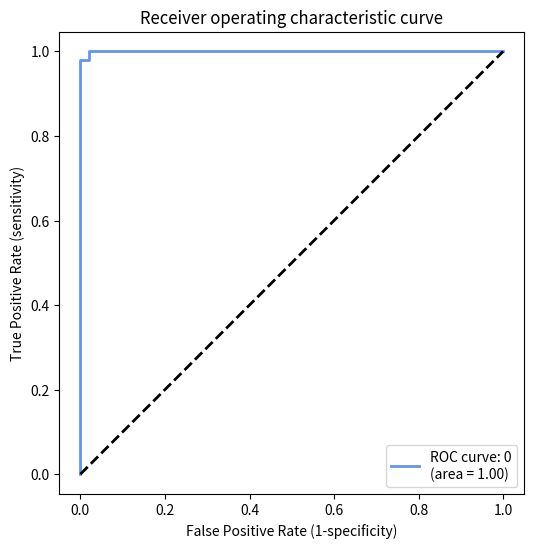

In [214]:
#@title 畫出 ROC曲線
#@markdown https://zh.wikipedia.org/zh-tw/ROC%E6%9B%B2%E7%BA%BF
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 分別算出每一類別的 FPR(假陽率) TPR(真陽率) AUC(roc_curve底下的面積)
fpr, tpr, _ = roc_curve(y_true[:], y_pred_prob[:])
roc_auc = auc(fpr, tpr)

# plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(fpr, tpr, color='cornflowerblue', lw=2,
            label=f'ROC curve: {0}\n(area = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set(xlim=(0.0, 1.0), ylim=(0.0, 1.0))
ax.axis('equal')
ax.set_xlabel('False Positive Rate (1-specificity)')
ax.set_ylabel('True Positive Rate (sensitivity)')
ax.set_title('Receiver operating characteristic curve')
ax.legend(loc="lower right")
plt.show()

In [215]:
# 信心值超過多少預測為陽性
threshold = 0.7
y_pred = y_pred_prob > threshold
display("y_true =", y_true.astype(int))
display("y_pred =", y_pred.astype(int))

'y_true ='

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

'y_pred ='

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


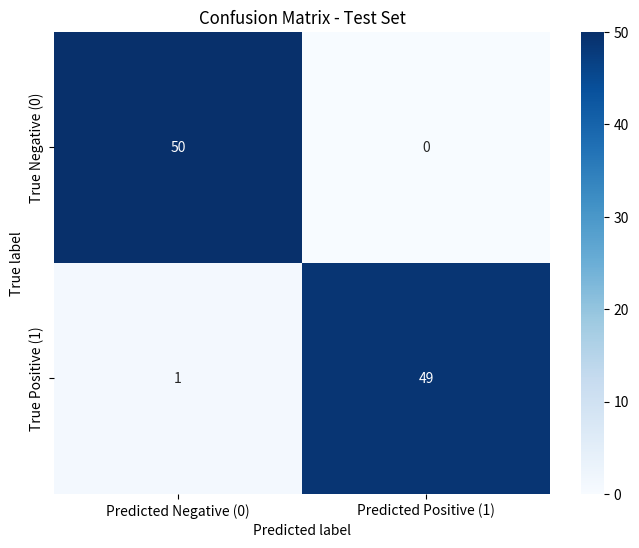

In [216]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
y_pred_prob = model.predict(X_test_bow_dense)
y_pred = (y_pred_prob >= 0.7).astype(int).flatten()
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [217]:
# 自訂意 cost function [TODO]
def cost_fn(y_true, y_pred_prob, threshold=0.7):
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred_prob > threshold)
    cost = (tp * -10000) + (fn * -200000) + (fp * -10000) + (tn * 200000)

    return int(cost)

# function test:
cost_fn(y_true, y_pred_prob, threshold=0.7)

9310000

In [218]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [219]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.7).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

[True Negative]
Text: 0%原汁不沾手、不費力滿滿的維他命AAA小小一顆大大營養調飲、料理皆可用沖煮調烘超便利。
True Label: 0
Pred Label: 0

[True Positive]
Text: 美肌纖體細琢零瑕美肌、彈力支撐。肌膚就是要澎、亮、潤、透。喚醒彈力記憶關鍵醫美醫師指定成分彈嫩支撐鎖水防護。現在的彈力度是我從來沒有感受過的。如同彈簧床中的彈簧角色是喚醒彈力記憶的重要關鍵。鎖住水份彈潤透亮。醫美醫師指定成分。服用。
True Label: 1
Pred Label: 1

[False Negative]
Text: 鈣質。而且不只影響我們的行動力、小朋友的成長狀況甚至也跟睡眠、情緒有相關。海藻鈣結構為蜂窩多孔性結構提供更好的吸收率可以高達000%。添加日本專利AAA水解蛋黃粉可以協同鈣作用。紐西蘭酪蛋白水解產物可幫助鈣質在消化道形成可溶性狀態促進鈣吸收。市售最高海藻鈣。
True Label: 1
Pred Label: 0

[Random]
Text: 清除壞自由基減少炎症反應。強抗炎藥抗衰老。氫氣可以在000餘種疾病中發揮保護和治療作用。許多腫瘤等都是慢性炎症過程。氫分子主要針對慢性疾病。腫瘤也很難長。清除氧化自由基的清除有促進作用。證明氫氣可以在000餘種疾病中發揮保護和治療作用。鍾南山談氫氣對肺炎等疾病的治療與預防作用。
True Label: 1
Pred Label: 1

[Random]
Text: 歐美發明金牌獎全球多國認證德國專利新型技術。美國科學發明獎金牌。A。波蘭華沙發明獎。
True Label: 0
Pred Label: 0


## (6) 預測資料⭐️⭐️⭐️

In [220]:
import pandas as pd

# === 載入測試資料 ===
# 假設檔案放在同一個資料夾底下
predict_df = pd.read_csv("/content/predict_sample.csv")
predict_df

,ID,content_cleaned
0,1,拉蓓。閃纖舒眠益生菌凍每日一條輕鬆入口幫助調節生理機能維持腸道健康。富含膳食纖維促進消化道蠕...
1,2,天堂椒可以騙大腦的交感神經它可以騙大腦增加我們的靜態能量消耗。0瘦000公斤瘦了奶奶還變大。
2,3,每日一包堅果乾保持身體健康內含000種無調味堅果可加入牛奶或優格當早餐食用內為小包裝設計方便...
3,4,惠氏啟賦啟賦水解。0含豐富營養素有助於維持消化道機能促進腸道蠕動讓您每天輕鬆調節生理機能享受...
4,5,這款桔梗水梨汁有鎮咳抗炎以及抗氧化功效。氣管敏感朋友的救星。尤其特別適合容易喉嚨敏感、氣管、...
...,...,...
95,96,\。A鱸魚精讓你輕鬆補充營養活力滿滿。術後補養首選。每天來一包。金目鱸魚精華。國家健康食品。...
96,97,學習領先關鍵。專為兒童設計。迷你可咀嚼軟膠囊好吞又好咬。無色素無人工香料寶貝補充好安心。
97,98,想豐胸促進胸部成長刺激女性荷爾蒙幫助發育促進乳腺管增長住膠原蛋白增生調理內分泌平衡荷爾蒙美肌...
98,99,買000送000拉蓓燉雞精精煉純雞搭配獨特配方簡單烹煮優雅濃郁的湯頭讓您享受美味的雞肉風味。...


from matplotlib import pyplot as plt
predict_df['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = predict_df.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
predict_df['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [221]:
# ====== 1. 對預測資料進行斷詞(如同3A) ======
predict_df["content_segmented"] = predict_df["content_cleaned"].apply(segment_text)

# ====== 2. 使用訓練過的 vectorizer 進行特徵轉換(如同3B) ======
# 只能用 transform，不能用 fit 或 fit_transform
# 因為 vectorizer 的詞彙表已經在訓練階段確定，不能改變
X_predict_bow = vectorizer.transform(predict_df["content_segmented"])

# ====== 3. 轉換成 Dense Tensor (如果4有進行此步驟) ======
X_predict_dense = X_predict_bow.todense()

# ====== 4. 使用訓練好的模型進行預(假設閾值為0.7) ======
y_proba = model.predict(X_predict_dense).ravel()   # 機率 0~1
y_pred = (y_proba >= 0.7).astype(int)              # 二元分類結果 0/1

# ====== 5. 輸出成 CSV 檔案 ======
output_df = pd.DataFrame({
    "ID": predict_df["ID"],
    "label": y_pred
})

output_file = "group2_陳萱鎂_answer_v0.csv"
output_df.to_csv(output_file, index=False, encoding="utf-8-sig")
output_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,ID,label
0,1,0
1,2,1
2,3,0
3,4,0
4,5,1
...,...,...
95,96,0
96,97,0
97,98,1
98,99,0


In [222]:
---------

SyntaxError: invalid syntax (ipython-input-567458762.py, line 1)

---------------------------------------------------

## SHAP 實作(KernelExplainer)

In [ ]:
import shap

shap.initjs()

首先建立一個通用的 KernelExplainer 解釋器，並嘗試剖析剛剛所訓練的 SVM 分類模型。以下是常用的設定參數與說明：

Parameters:
- model：待解釋的模型。支援 sklearn 所封裝的模型，迴歸器可以使用 `model.predict`，分類器可以使用 `model.predict_proba`。
- data：可採樣的資料集，用於產生隨機擾動抽樣的子集，此資料用於訓練 SHAP 解釋模型。
- link：將SHAP簡單模型的預測輸出轉換為實際預測值的函數，提供兩種設定分別為 "identity" 和 "logit"。

以下程式放入已訓練的模型並呼叫 predict_proba 計算預測機率。而 data 從訓練集中拿前 50 筆出來，作為採樣的母群。採樣的數量 nsamples 數設為 100，即代表將透過蒙地卡羅法擾動從 data 中採樣 100 筆出來並訓練一個 SHAP 簡單的可解釋的模型。而每個隨機採樣的樣本(samples)需要對原始 50 筆資料進行隨機擾動與推論(取得 f() 預測 y)，因此總共需要 `500 * 50` 次模型推論來產生這 100 筆資料。然而 SHAP 官方建議 data 的資料量盡量不要超過 100 筆，以免會花費大量的計算成本。原始碼可以從這裡[參考](https://github.com/shap/shap/blob/1ccbf672399d3467e4e4433894ed00e4f067e258/shap/explainers/_kernel.py#L104)。

In [ ]:
# 使用 Kernel SHAP 解釋模型
explainer = shap.KernelExplainer(model=model.predict, data=X_train_bow[:50].toarray(), link='logit')

In [ ]:
shap_values = explainer.shap_values(X=X_test_bow_dense.A, nsamples=100) # Convert numpy.matrix to numpy.ndarray using .A

In [ ]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

## 全局解釋模型
### SHAP Summary Plot
SHAP Summary Plot 可以幫助了解模型的特徵重要性，幫助解釋模型的預測。如果某個特徵的 SHAP 值較大且穩定，則可以認為該特徵對模型預測的影響較大且較一致。反之，如果特徵的 SHAP 值較小且不穩定，則可能認為該特徵對模型預測的影響較小或不一致。

- 點的顏色: Feature value 的大小，越紅越大、越藍越小
- X 軸: 該點對於 shap value 的影響，也就是對預測值的影響
- Y 軸: 每個特徵

我們可以使用 `plot_type` 參數設置 `bar` 畫一張條形圖，不同顏色代表不同類別(以下範例藍色代表預測Yes的重要程度，紅色為No)，每個條形代表一個特徵，並顯示該特徵對模型預測的影響程度。在這個圖表中，每個特徵對於各個類別的影響被堆疊起來，以創建整體的特徵重要性圖。

In [ ]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/

In [ ]:
import pandas as pd                             #用於讀取資料集，或製作資料框架
import matplotlib.pyplot as plt                 #用於繪製統計圖

import matplotlib as mpl                        #用於設定中文字型
from matplotlib.font_manager import fontManager #用於設定中文字型

#設定中文字型（若無需求可跳過）
fontManager.addfont('/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

In [ ]:
# Define class names and feature names for SHAP plots
y_label_names = ['Non-Promotional', 'Promotional']
x_feature_names = vectorizer.get_feature_names_out()

shap.summary_plot(shap_values.squeeze(), X_test_bow_dense.A, plot_type="bar", class_names=y_label_names, feature_names=x_feature_names)

In [ ]:
!pip install fonttools
!sudo apt-get install -y fonts-noto-cjk-sc

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Refresh matplotlib's font cache (removed fm._rebuild() as it's deprecated/removed)

# Set Chinese font
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['axes.unicode_minus'] = False # To display negative signs correctly

print("Matplotlib configured to use Noto Sans CJK JP font.")

In [ ]:
shap.summary_plot(shap_values.squeeze(), X_test_bow_dense.A, plot_type="bar", class_names=y_label_names, feature_names=x_feature_names)

In [ ]:
shap.summary_plot(shap_values.squeeze(), X_test_bow_dense.A, feature_names=x_feature_names)

我們也可以觀察特定類別的 summary_plot。假設我想看模型對於預測 Yes 的重要程度，可以使用 `shap_values[1]` 的資料取得每筆測試集的 Shapely values 進行全局的解釋。以下圖來說我們可以得知模型在判斷是否罹患糖尿病情況下大多會看葡萄糖濃度(Glucose)，當數值越大越有機會罹患糖尿病。第二個重要的特徵為年齡，同樣也是當年齡越大越有機會罹患糖尿病。

In [ ]:
shap.summary_plot(shap_values.squeeze(), X_test_bow_dense.A, feature_names=x_feature_names)

### SHAP Dependence Plot
SHAP 相依圖是一種散點圖，顯示了單一特徵對模型所做預測的影響。在這個例子中，當每位葡萄糖濃度越高相對應的 Shapely values 逐漸增加。

- 每個點代表資料集中的一筆預測資料
- X 軸：該特徵的實際值
- Y 軸：該特徵的 SHAP 值，表示知道該特徵的值有多大程度上改變了該樣本預測的模型輸出。

In [ ]:
#shap.dependence_plot('Glucose', shap_values[1], X_test, feature_names=x_feature_names)

## 局部解釋模型
### SHAP Force plot
我們可以觀察單一筆資料在模型中的預測情況。在 SHAP 套件中，「Force Plot」方法提供了針對單一模型預測的解釋性呈現。在這個圖表中，我們可以清楚地看到各特徵對模型對特定輸入值的預測所做的貢獻。這種方法在進行錯誤分析或深入理解特定情況下的資料時非常有幫助。

從以下圖表我們可以觀察：
1. 模型在測試集中的第一筆資料預測NO的機率有0.11，Yes的機率有0.89
2. base value: 代表模型在不看任何特徵狀況下預測的數值，在這個例子中，基準值 = 0.379。
3. 每個特徵後面的數字是該筆資料的特徵值，例如 Age 49 歲。
4. 紅色代表該特徵會增加判斷Yes的機率。而藍色代表該特徵會降低罹患糖尿病的機率。
5. 箭頭的寬度表示該特徵對輸出的影響越大。
6. Glucose、DiabetesPedigreeFunction、Age 這三個特徵明顯是判斷罹患糖尿病的重要因子。

In [ ]:
import numpy as np
x = explainer.expected_value[0]
x

In [ ]:
shap.initjs()
# 觀察測試集中第一筆資料預測為Yes的重要程度
index=0
print(f'測試集第 {index+1} 筆模型預測結果: {model.predict(X_test_bow_dense.A[index:index+1])[0][0]}')
shap.force_plot(explainer.expected_value[0], shap_values[index].squeeze(), X_test_bow_dense.A[index], feature_names=x_feature_names, link='logit')

In [ ]:
# https://github.com/shap/shap/blob/c8bae704f9d7703c47a916ec1d449a6d30441c4f/shap/common.py#L206C9-L206C9
x = np.sum(shap_values[index]) + explainer.expected_value[0]
x

In [ ]:
shap.initjs()
# 觀察測試集中第一筆資料預測為No的重要程度
shap.force_plot(explainer.expected_value[0], shap_values[index].squeeze(), X_test_bow_dense.A[index], feature_names=x_feature_names)

In [ ]:
x=np.sum(shap_values[index])+explainer.expected_value[0]
x